In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("../input"))

['GCP-Coupons-Instructions.rtf', 'train.csv', 'sample_submission.csv', 'test.csv']


In [118]:
datatypes = {'key': 'str', 
              'fare_amount': 'float32',
              'pickup_datetime': 'str', 
              'pickup_longitude': 'float32',
              'pickup_latitude': 'float32',
              'dropoff_longitude': 'float32',
              'dropoff_latitude': 'float32',
              'passenger_count': 'uint8'}

train_df = pd.read_csv('../input/train.csv', nrows=5000000, dtype=datatypes)

In [119]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.132035e+01,-7.128638e+01,4.173919e+01,-7.128626e+01,4.173621e+01,1.684695e+00
std,9.775069e+00,1.263840e+01,9.093792e+00,1.268524e+01,9.608747e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076712e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310365e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [120]:
test_df = pd.read_csv('../input/test.csv', dtype=datatypes)
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751553,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [121]:
def manhattan_distance(lat1, long1, lat2, long2):
    diff_lat = abs(lat1 - lat2)
    diff_long = abs(long1 - long2)
    return (diff_lat + diff_long)

def distance_between_points(df):
    df['diff_lat'] = abs(df['dropoff_latitude'] - df['pickup_latitude'])
    df['diff_long'] = abs(df['dropoff_longitude'] - df['pickup_longitude'])
    df['manhattan_dist'] = df['diff_lat'] + df['diff_long']
    
    jfk = [40.6413, -73.7781]
    lga = [40.7769, -73.8740]
    ewr = [40.6895, -74.1745]
    # how far was this ride from the 3 nearby airports?
    df['jfk_dist_pickup'] = manhattan_distance(df['pickup_latitude'], df['pickup_longitude'], jfk[0], jfk[1])
    df['jfk_dist_dropoff'] = manhattan_distance(df['dropoff_latitude'], df['dropoff_longitude'], jfk[0], jfk[1])
    df['lga_dist_pickup'] = manhattan_distance(df['pickup_latitude'], df['pickup_longitude'], lga[0], lga[1])
    df['lga_dist_dropoff'] = manhattan_distance(df['dropoff_latitude'], df['dropoff_longitude'], lga[0], lga[1])
    df['ewr_dist_pickup'] = manhattan_distance(df['pickup_latitude'], df['pickup_longitude'], ewr[0], ewr[1])
    df['ewr_dist_dropoff'] = manhattan_distance(df['dropoff_latitude'], df['dropoff_longitude'], ewr[0], ewr[1])
    
distance_between_points(train_df)

In [124]:
def extract_date_details(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')
    df['year'] = df['pickup_datetime'].apply(lambda date: date.year)
    df['month'] = df['pickup_datetime'].apply(lambda date: date.month)
    df['day'] = df['pickup_datetime'].apply(lambda date: date.weekday())
    df['hour'] = df['pickup_datetime'].apply(lambda date: date.hour)
    
extract_date_details(train_df)
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,diff_lat,diff_long,manhattan_dist,jfk_dist_pickup,jfk_dist_dropoff,lga_dist_pickup,lga_dist_dropoff,ewr_dist_pickup,ewr_dist_dropoff,year,month,day,hour
0,2009-06-15 17:26:21.0000001,4.500000,2009-06-15 17:26:21,-73.844315,40.721317,-73.841614,40.712276,1,0.009041,0.002701,0.011742,0.146232,0.134490,0.085268,0.097010,0.362003,0.355663,2009,6,0,17
1,2010-01-05 16:52:16.0000002,16.900000,2010-01-05 16:52:16,-74.016045,40.711304,-73.979271,40.782005,1,0.070702,0.036774,0.107475,0.307948,0.341876,0.207641,0.110376,0.180259,0.287734,2010,1,1,16
2,2011-08-18 00:35:00.00000049,5.700000,2011-08-18 00:35:00,-73.982735,40.761269,-73.991241,40.750561,2,0.010708,0.008507,0.019215,0.324603,0.322402,0.124366,0.143581,0.263534,0.244319,2011,8,3,0
3,2012-04-21 04:30:42.0000001,7.700000,2012-04-21 04:30:42,-73.987129,40.733143,-73.991570,40.758091,1,0.024948,0.004440,0.029388,0.300872,0.330260,0.156886,0.136379,0.231014,0.251521,2012,4,5,4
4,2010-03-09 07:51:00.000000135,5.300000,2010-03-09 07:51:00,-73.968094,40.768009,-73.956657,40.783764,1,0.015755,0.011436,0.027191,0.316703,0.321021,0.102985,0.089521,0.284915,0.312106,2010,3,1,7
5,2011-01-06 09:50:45.0000002,12.100000,2011-01-06 09:50:45,-74.000961,40.731628,-73.972893,40.758232,1,0.026604,0.028069,0.054672,0.313190,0.311725,0.172233,0.117561,0.215667,0.270339,2011,1,3,9
6,2012-11-20 20:35:00.0000001,7.500000,2012-11-20 20:35:00,-73.980003,40.751663,-73.973801,40.764843,1,0.013180,0.006203,0.019382,0.312267,0.319244,0.131240,0.111858,0.256660,0.276042,2012,11,1,20
7,2012-01-04 17:22:00.00000081,16.500000,2012-01-04 17:22:00,-73.951302,40.774139,-73.990097,40.751049,1,0.023090,0.038795,0.061886,0.306041,0.321746,0.080062,0.141948,0.307838,0.245952,2012,1,2,17
8,2012-12-03 13:10:00.000000125,9.000000,2012-12-03 13:10:00,-74.006462,40.726711,-73.993080,40.731628,1,0.004917,0.013382,0.018299,0.313773,0.305309,0.182651,0.164352,0.205249,0.223548,2012,12,0,13
9,2009-09-02 01:11:00.00000083,8.900000,2009-09-02 01:11:00,-73.980659,40.733871,-73.991539,40.758137,2,0.024265,0.010880,0.035145,0.295131,0.330276,0.149688,0.136302,0.238212,0.251598,2009,9,2,1


In [125]:
def remove_outliers(df):
    # remove nulls
    df = df.dropna()
    
    # remove any lat/long changes that are too big or too small
    df = df[(df['diff_lat'] < 5.0) & (df['diff_long'] < 5.0)]
    df = df[(df['diff_lat'] > .001) & (df['diff_long'] > .001)]
    
    # remove any pickups/dropoffs not within nyc bounds
    df = df[(df['pickup_longitude'] < -72) & (df['pickup_longitude'] > -75)]
    df = df[(df['pickup_latitude'] < 42) & (df['pickup_latitude'] > 39)]
    df = df[(df['dropoff_longitude'] < -72) & (df['dropoff_longitude'] > -75)]
    df = df[(df['dropoff_latitude'] < 42) & (df['dropoff_latitude'] > 39)]

    # remove invalid fare or passenger count
    df = df[(df['fare_amount'] > 2.50) & (df['fare_amount'] < 200) & (df['passenger_count'] <= 6) & (df['passenger_count'] > 0)] 
    return df
    
train_df = remove_outliers(train_df)
len(train_df)

4487307

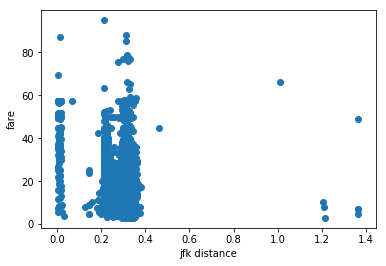

In [126]:
plt.scatter(train_df[:10000]['jfk_dist_pickup'], train_df[:10000]['fare_amount'])
plt.xlabel('jfk distance')
plt.ylabel('fare')
plt.show()

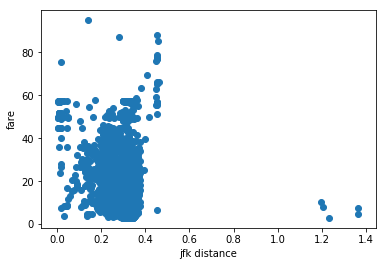

In [127]:
plt.scatter(train_df[:10000]['jfk_dist_dropoff'], train_df[:10000]['fare_amount'])
plt.xlabel('jfk distance')
plt.ylabel('fare')
plt.show()

In [ ]:
plt.scatter(train_df[:10000]['manhattan_dist'], train_df[:10000]['fare_amount'])
plt.xlabel('manhattan distance')
plt.ylabel('fare')
plt.show()

In [ ]:
train_df.describe()

In [ ]:
def convert_to_one_hot (column, num_buckets, df, starting_index = 0):
    df_size = df.shape[0]
    one_hots = np.zeros((df_size, num_buckets), dtype='byte')
    one_hots[np.arange(df_size), df[column].values - starting_index] = 1
    return one_hots

In [ ]:
year = convert_to_one_hot('year', 7, train_df, 2009)
hour = convert_to_one_hot('hour', 24, train_df, 0)

In [ ]:
train_df.shape

In [ ]:
def bucketize_feature(df,column):
    # split rides into 10 bins where 10% of rides were
    # use the quantile splits from train_df data
    buckets = train_df[column].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]).values
    bins = np.array(df[column].values)
    
    # set bin number
    lower_bound = -100000
    for i in range(buckets.shape[0]):
        upper_bound = buckets[i]
        bins[(bins >= lower_bound) & (bins < upper_bound)] = i
        lower_bound = upper_bound
    bins[(bins < 0) | (bins > 8)] = 9
    bins = np.array(bins, dtype='byte')

    return bins
p_long = bucketize_feature(train_df, 'pickup_longitude')
p_lat = bucketize_feature(train_df, 'pickup_latitude')
d_long = bucketize_feature(train_df, 'dropoff_longitude')
d_lat = bucketize_feature(train_df, 'dropoff_latitude')

In [ ]:
print(p_long)
print(p_lat)

In [ ]:
def feature_cross(a1, a2):
    rows = a1.shape[0]
    # 10 buckets for each, means 10*10 columns in feature cross
    cols = 100
    cross = np.zeros((rows, cols), dtype='byte')
    cross[np.arange(rows), (a1 * 10) + a2] = 1
    return cross

# cross latitudes and longitudes to get 1-hot vector representing grid of nyc
p_lat_x_long = feature_cross(p_lat, p_long)
d_lat_x_long = feature_cross(d_lat, d_long)

In [ ]:
unique, counts = np.unique(p_long, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique(p_lat, return_counts=True)
print (np.asarray((unique, counts)).T)

In [ ]:
print (p_lat_x_long.shape)
print (d_lat_x_long.shape)
print (year.shape)
print (hour.shape)
print (train_df['manhattan_dist'].shape)

In [ ]:
# combine engineered features to create input layer
manhattan = train_df['manhattan_dist'].values.reshape(len(train_df), 1)
jfk_p = train_df['jfk_dist_pickup'].values.reshape(len(train_df), 1)
jfk_d = train_df['jfk_dist_dropoff'].values.reshape(len(train_df), 1)
lga_p = train_df['lga_dist_pickup'].values.reshape(len(train_df), 1)
lga_d = train_df['lga_dist_dropoff'].values.reshape(len(train_df), 1)
ewr_p = train_df['ewr_dist_pickup'].values.reshape(len(train_df), 1)
ewr_d = train_df['ewr_dist_dropoff'].values.reshape(len(train_df), 1)

train_X = np.concatenate((p_lat_x_long, d_lat_x_long, year, hour, manhattan, jfk_p, jfk_d, lga_p, lga_d, ewr_p, ewr_d), axis=1)
train_y = train_df['fare_amount'].values
print(train_X.shape)
print(train_y.shape)

In [ ]:
validate_df = pd.read_csv('../input/train.csv', skiprows=range(1,10000001), nrows=10000, dtype=datatypes)

In [ ]:
distance_between_points(validate_df)
validate_df = remove_outliers(validate_df)

def extract_features(df):
    #preprocess data, extract features we care about
    extract_date_details(df)
    p_lo = bucketize_feature(df, 'pickup_longitude')
    p_la = bucketize_feature(df, 'pickup_latitude')
    d_lo = bucketize_feature(df, 'dropoff_longitude')
    d_la = bucketize_feature(df, 'dropoff_latitude')
    p_la_x_lo = feature_cross(p_la, p_lo)
    d_la_x_lo = feature_cross(d_la, d_lo)
    yr = convert_to_one_hot('year', 7, df, 2009)
    hr = convert_to_one_hot('hour', 24, df, 0)
    manhattan = df['manhattan_dist'].values.reshape(len(df), 1)
    jfk_p = df['jfk_dist_pickup'].values.reshape(len(df), 1)
    jfk_d = df['jfk_dist_dropoff'].values.reshape(len(df), 1)
    lga_p = df['lga_dist_pickup'].values.reshape(len(df), 1)
    lga_d = df['lga_dist_dropoff'].values.reshape(len(df), 1)
    ewr_p = df['ewr_dist_pickup'].values.reshape(len(df), 1)
    ewr_d = df['ewr_dist_dropoff'].values.reshape(len(df), 1)

    print (p_la_x_lo.shape)
    print (d_la_x_lo.shape)
    print (yr.shape)
    print (hr.shape)
    print (manhattan.shape)

    X = np.concatenate((p_la_x_lo, d_la_x_lo, yr, hr, manhattan, jfk_p, jfk_d, lga_p, lga_d, ewr_p, ewr_d), axis=1)
    return X

X = extract_features(validate_df)
true_y = validate_df['fare_amount'].values

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_dim=238))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam',
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error
model.fit(train_X, train_y, epochs=15, batch_size=256,validation_split=0.1)

In [ ]:
result = model.predict(X).flatten()

In [ ]:
mean_y = np.mean(train_df['fare_amount'].values)
# result[result > 100] = mean_y
diff = true_y - result
mse = np.sum(diff ** 2) / len(diff)
rmse = np.sqrt(mse)
print (rmse)

In [ ]:
distance_between_points(test_df)
X_test = extract_features(test_df)
pred_y_test = model.predict(X_test).flatten()

In [ ]:
print (max(pred_y_test))
print (min(pred_y_test))

In [ ]:
sample_submission = pd.read_csv('../input/sample_submission.csv')

In [ ]:
sample_submission['fare_amount'] = pd.Series(pred_y_test)
sample_submission.to_csv('nn_submission.csv', index=False)